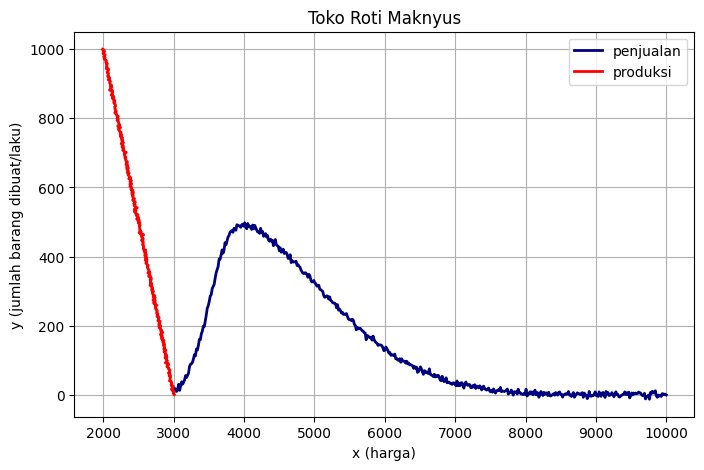

In [ ]:
# nama: Alysha Khanza Dwi Avianti
# NPM: 24083010123

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

# range harga jual
x = np.linspace(3000, 10000, 500)

# rescale parameters
a = 6
loc = 3.5 * 1000     # shift loc
scale = 1.5 * 1000   # widen scale

# probability density, right tail skew
y = skewnorm.pdf(x, a=a, loc=loc, scale=scale) * 1000

np.random.seed(123) # masukkan NPM
y = y + np.random.normal(0, 0.005, size=x.shape)  # add Gaussian noise
y = y*1000

# harga produksi
produksi_y= np.linspace(0, 1000, len(x))
produksi_z = np.linspace(3000, 2000, len(x)) + np.random.normal(0, 0.1, size=x.shape)*100
# linearly decreases from 3000 -> 2000 for quantity 0 -> 1000

# Plot
plt.figure(figsize=(8,5))
plt.plot(x, y, color="navy", label='penjualan', linewidth=2)
plt.plot(produksi_z, produksi_y, color="red", label='produksi', linewidth=2)
plt.title("Toko Roti Maknyus")
plt.xlabel("x (harga)")
plt.ylabel("y (jumlah barang dibuat/laku)")
plt.grid(True)
plt.legend()
plt.show()

# tugas:
# hitung volume produksi yang menghasilkan kentungan maksimum
#    (pendapatan dari penjualan dikurangi produksi)
# kirim ke muhammad_zulhaj.sada@upnjatim.ac.id

Harga optimal (p*): 4655.31
Volume produksi optimal (q*): 405.19 unit
Laba maksimum (π*): 752530.82


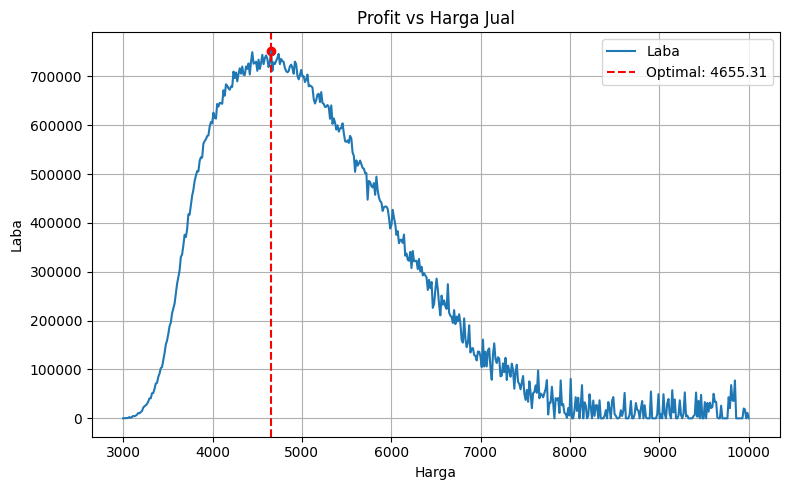

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm
from scipy.integrate import cumulative_trapezoid

x = np.linspace(3000, 10000, 500)  # Harga jual (price range)

# Parameter distribusi permintaan
a = 6
loc = 3.5 * 1000
scale = 1.5 * 1000

# Kurva permintaan: jumlah barang terjual berdasarkan harga
y = skewnorm.pdf(x, a=a, loc=loc, scale=scale) * 1000
np.random.seed(123)  # seed random
y = y + np.random.normal(0, 0.005, size=x.shape)
y = y * 1000  # Skala permintaan

# Kurva biaya produksi: biaya per unit menurun seiring jumlah
produksi_y = np.linspace(0, 1000, len(x))  # Kuantitas (0-1000)
produksi_z = np.linspace(3000, 2000, len(x)) + np.random.normal(0, 0.1, size=x.shape) * 100

# Hitung biaya total kumulatif dengan integrasi trapesium
cum_cost_grid = np.concatenate(([0.0], cumulative_trapezoid(produksi_z, produksi_y)))

def cumulative_cost(q):
    """Hitung biaya produksi total untuk jumlah q unit"""
    q = np.clip(q, 0, produksi_y[-1])
    return np.interp(q, produksi_y, cum_cost_grid)

# Hitung profit untuk setiap harga
q_demand = np.maximum(y, 0.0)                 # Permintaan di tiap harga
q_cap = np.minimum(q_demand, produksi_y[-1])  # Batas kapasitas (1000 unit)

revenue = x * q_cap                           # Pendapatan
cost = np.array([cumulative_cost(q) for q in q_cap])  # Biaya total
profit = revenue - cost                       # Laba

# Cari titik optimum
idx = np.argmax(profit)
p_star = x[idx]
q_star = q_cap[idx]
pi_star = profit[idx]

# Cetak hasil
print(f"Harga optimal (p*): {p_star:.2f}")
print(f"Volume produksi optimal (q*): {q_star:.2f} unit")
print(f"Laba maksimum (π*): {pi_star:.2f}")

# Plot kurva profit vs harga
plt.figure(figsize=(8,5))
plt.plot(x, profit, label='Laba')
plt.axvline(p_star, color='red', linestyle='--', label=f'Optimal: {p_star:.2f}')
plt.scatter([p_star], [pi_star], color='red')
plt.title("Profit vs Harga Jual")
plt.xlabel("Harga")
plt.ylabel("Laba")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Harga jual optimal (p*): Rp4.655,31 per unit

Volume produksi optimal (q*): ±405,19 unit

Laba maksimum (π*): ±Rp752.530,82

Titik optimal menggambarkan kondisi di mana harga jual dan jumlah produksi berada pada kombinasi terbaik untuk memaksimalkan keuntungan. Jika harga ditetapkan lebih rendah dari nilai optimal, penjualan akan meningkat tetapi keuntungan per unit menurun sehingga total laba menurun. Sebaliknya, jika harga terlalu tinggi, penjualan akan menurun drastis sehingga laba juga berkurang.

Dengan demikian, menetapkan harga pada Rp4.655,31 per unit dan memproduksi sekitar 405 unit akan memberikan laba tertinggi bagi perusahaan berdasarkan data dan simulasi yang digunakan.